In [6]:
import pymysql
import pandas as pd

# Conexión a la base de datos
connection = pymysql.connect(
    host='db-rds-mysql.c9u4gqc8kn9n.us-east-2.rds.amazonaws.com',
    user='admin_mysql',
    password='********************',
    database='sakila_db',
    port=3306  # Puerto de MySQL (por defecto es 3306)
)

In [7]:
# Leer datos de la tabla 'flights' y cargarlos en una variable llamada 'flights'
flights = pd.read_sql("SELECT * FROM flights", connection)

# Leer datos de la tabla 'airline' y cargarlos en una variable llamada 'airline'
airlines = pd.read_sql("SELECT * FROM airlines", connection)

# Leer datos de la tabla 'airports' y cargarlos en una variable llamada 'airports'
airports = pd.read_sql("SELECT * FROM airports", connection)

# Leer datos de la tabla 'planes' y cargarlos en una variable llamada 'planes'
planes = pd.read_sql("SELECT * FROM planes", connection)

# Leer datos de la tabla 'weather' y cargarlos en una variable llamada 'weather'
weather = pd.read_sql("SELECT * FROM weather", connection)

# Cerrar la conexión para que no de problema la base original
connection.close()

C:\Users\jordi\AppData\Local\Temp\ipykernel_10460\4027707684.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  flights = pd.read_sql("SELECT * FROM flights", connection)
C:\Users\jordi\AppData\Local\Temp\ipykernel_10460\4027707684.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  airlines = pd.read_sql("SELECT * FROM airlines", connection)
C:\Users\jordi\AppData\Local\Temp\ipykernel_10460\4027707684.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  airports = pd.read_sql("SELECT * FROM airports", connection)
C:\Users\

In [16]:
df = flights.merge(airlines, how='left', left_on='carrier', right_on='carrier') \
                     .merge(airports, how='left', left_on='origin', right_on='origin') \
                     .merge(planes.drop(columns=['year']), how='left', left_on='tailnum', right_on='tailnum') \
                     .merge(weather.drop(columns=['time_hour']), how='left', left_on=['origin', 'year', 'month', 'day', 'hour'], right_on=['origin', 'year', 'month', 'day', 'hour'])

# Mostrar las primeras filas del resultado
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,engine,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2013.0,1.0,1.0,517.0,515.0,2.0,830.0,819.0,11.0,UA,...,Turbo-fan,39.02,28.04,64.43,260.0,12.65860,0.0000,0.0,1011.9,10.0
1,2013.0,1.0,1.0,533.0,529.0,4.0,850.0,830.0,20.0,UA,...,Turbo-fan,39.92,24.98,54.81,250.0,14.96010,21.8648,0.0,1011.4,10.0
2,2013.0,1.0,1.0,542.0,540.0,2.0,923.0,850.0,33.0,AA,...,Turbo-fan,39.02,26.96,61.63,260.0,14.96010,0.0000,0.0,1012.1,10.0
3,2013.0,1.0,1.0,544.0,545.0,-1.0,1004.0,1022.0,-18.0,B6,...,Turbo-fan,39.02,26.96,61.63,260.0,14.96010,0.0000,0.0,1012.1,10.0
4,2013.0,1.0,1.0,554.0,600.0,-6.0,812.0,837.0,-25.0,DL,...,Turbo-fan,39.92,24.98,54.81,260.0,16.11090,23.0156,0.0,1011.7,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013.0,9.0,30.0,0.0,1455.0,0.0,0.0,1634.0,0.0,9E,...,None,68.00,55.04,63.21,190.0,11.50780,0.0000,0.0,1016.6,10.0
336772,2013.0,9.0,30.0,0.0,2200.0,0.0,0.0,2312.0,0.0,9E,...,None,64.94,53.06,65.37,200.0,6.90468,0.0000,0.0,1015.8,10.0
336773,2013.0,9.0,30.0,0.0,1210.0,0.0,0.0,1330.0,0.0,MQ,...,None,69.08,48.02,46.99,70.0,5.75390,0.0000,0.0,1016.7,10.0
336774,2013.0,9.0,30.0,0.0,1159.0,0.0,0.0,1344.0,0.0,MQ,...,None,66.92,48.92,52.35,70.0,8.05546,0.0000,0.0,1017.5,10.0


# PREGUNGAS DE NEGOCIO

**1. ¿Cuál es la aerolínea con el mayor retraso promedio en la salida (dep_delay)?**

In [74]:
aerolinea_mayor_retraso_salida = df.groupby('carrier')['dep_delay'].mean().idxmax()
print("La aerolínea con el mayor retraso promedio en la salida es:", aerolinea_mayor_retraso_salida)


La aerolínea con el mayor retraso promedio en la salida es: F9


**2. ¿Cuál es la distancia promedio de los vuelos por aeropuerto de origen?**

In [75]:
distancia_promedio_por_aeropuerto = df.groupby('origin')['distance'].mean()
print("Distancia promedio por aeropuerto de origen:\n", distancia_promedio_por_aeropuerto)


Distancia promedio por aeropuerto de origen:
 origin
EWR    1056.742790
JFK    1266.249077
LGA     779.835671
Name: distance, dtype: float64


**3. ¿Cuántos vuelos se realizaron por día durante todo el año?**

In [76]:
vuelos_por_dia = df.groupby(['year', 'month', 'day']).size()
print("Cantidad de vuelos por día:\n", vuelos_por_dia)


Cantidad de vuelos por día:
 year    month  day 
2013.0  1.0    1.0     842
               2.0     943
               3.0     914
               4.0     915
               5.0     720
                      ... 
        12.0   27.0    963
               28.0    814
               29.0    888
               30.0    968
               31.0    776
Length: 365, dtype: int64


**4. ¿Cuál es el porcentaje de vuelos con retraso en la salida por aerolínea?**

In [83]:
porcentaje_retraso_salida_por_aerolinea = (df[df['dep_delay'] > 0].groupby('carrier').size() / df.groupby('carrier').size()) * 100
print("Porcentaje de vuelos con retraso en la salida por aerolínea:\n", porcentaje_retraso_salida_por_aerolinea)


Porcentaje de vuelos con retraso en la salida por aerolínea:
 carrier
9E    38.261105
AA    31.048917
AS    31.652661
B6    39.251396
DL    31.679485
EV    42.713160
F9    49.781022
FL    50.736196
HA    20.175439
MQ    30.423912
OO    28.125000
UA    46.468934
US    23.251850
VX    43.103448
WN    53.425662
YV    38.768719
dtype: float64


**5. ¿Cuál es la altitud promedio de los aeropuertos de origen y destino?**

In [78]:
altitud_promedio_aeropuertos = df.groupby(['origin', 'dest'])['alt'].mean()
print("Altitud promedio de los aeropuertos de origen y destino:\n", altitud_promedio_aeropuertos)


Altitud promedio de los aeropuertos de origen y destino:
 origin  dest
EWR     ALB     18.0
        ANC     18.0
        ATL     18.0
        AUS     18.0
        AVL     18.0
                ... 
LGA     SYR     22.0
        TPA     22.0
        TVC     22.0
        TYS     22.0
        XNA     22.0
Name: alt, Length: 224, dtype: float64


**6. ¿Cuál es la aerolínea con el mayor número de vuelos realizados?**

In [79]:
aerolinea_mayor_numero_vuelos = df['carrier'].value_counts().idxmax()
print("La aerolínea con el mayor número de vuelos realizados es:", aerolinea_mayor_numero_vuelos)


La aerolínea con el mayor número de vuelos realizados es: UA


**7. ¿Cuál es la velocidad promedio del viento en los días lluviosos?**

In [80]:
velocidad_promedio_viento_dias_lluviosos = df[df['precip'] > 0]['wind_speed'].mean()
print("Velocidad promedio del viento en los días lluviosos:", velocidad_promedio_viento_dias_lluviosos)


Velocidad promedio del viento en los días lluviosos: 12.294014637857579


**8. ¿Cuál es la hora del día con la mayor cantidad de vuelos?**

In [81]:
hora_con_mayor_cantidad_vuelos = df['hour'].mode().iloc[0]
print("La hora del día con la mayor cantidad de vuelos es:", hora_con_mayor_cantidad_vuelos)


La hora del día con la mayor cantidad de vuelos es: 8.0


**9. ¿Cuál es el mes con la mayor cantidad de vuelos con retraso en la llegada?**

In [84]:
mes_con_mayor_retraso_llegada = df[df['arr_delay'] > 0]['month'].value_counts().idxmax()
print("El mes con la mayor cantidad de vuelos con retraso en la llegada es:", mes_con_mayor_retraso_llegada)


El mes con la mayor cantidad de vuelos con retraso en la llegada es: 12.0


**10. ¿Cuál es la temperatura promedio en los vuelos con un retraso en la llegada superior a 30 minutos?**

In [82]:
temperatura_promedio_retraso_llegada_30min = df[df['arr_delay'] > 30]['temp'].mean()
print("Temperatura promedio en los vuelos con retraso en la llegada superior a 30 minutos:", temperatura_promedio_retraso_llegada_30min)


Temperatura promedio en los vuelos con retraso en la llegada superior a 30 minutos: 58.772474339460636


# ETL y Analytics

**1. ¿En que país y que avión se encuentra entre el 85% y el 70% de la cantidad de aterrizajes? Proporcione el nombre del país y el nombre del avión.**

**Aviones**

In [85]:
# Calcular la suma acumulada de la cantidad de aterrizajes ordenando de menor a mayor
flights_sorted = df.groupby('tailnum').size().sort_values()
cumulative_sum = flights_sorted.cumsum()

# Calcular el total de aterrizajes
total_landings = cumulative_sum.max()

# Obtener el 70% y el 85% de la suma acumulada
seventy_percent = total_landings * 0.7
eighty_five_percent = total_landings * 0.85

# Encontrar los destinos que se encuentran entre el 70% y el 85% de la suma acumulada
dest_within_range = cumulative_sum[(cumulative_sum >= seventy_percent) & (cumulative_sum <= eighty_five_percent)]

# Obtener los aviones asociados a estos destinos
countries_within_range = df.loc[df['tailnum'].isin(dest_within_range.index), 'tailnum'].unique()


# Imprimir el resultado
print(f"Avión(es) que se encuentra(n) entre el 70% y el 85% de la cantidad de aterrizajes: {', '.join(countries_within_range)}")


Avión(es) que se encuentra(n) entre el 70% y el 85% de la cantidad de aterrizajes: N793JB, N657JB, N708JB, N644JB, N9EAMQ, N635JB, N13553, N709JB, N646JB, N779JB, N651JB, N563JB, N625JB, N624JB, N645JB, N510UA, N273JB, N570JB, N14542, N527JB, N521JB, N564JB, N203JB, N580JB, N775JB, N534JB, N503JB, N579JB, N615JB, N806JB, N306JB, N12567, N565JB, N13955, N520JB, N951UW, N320NB, N652JB, N29917, N11536, N13978, N612JB, N239JB, N517MQ, N14916, N14543, N957UW, N13538, N537JB, N14558, N636JB, N13958, N502UA, N13908, N920XJ, N13914, N512UA, N504JB, N231JB, N913XJ, N13975, N316JB, N712JB, N14959, N22909, N507MQ, N27962, N507JB, N557UA, N16911, N329JB, N661JB, N658JB, N663JB, N504MQ, N906XJ, N908XJ, N505JB, N727TW, N559JB, N925XJ, N905XJ, N632JB, N640JB, N602LR, N916XJ, N536JB, N535JB, N14953, N924XJ, N307JB, N284JB, N547JB, N531JB, N639JB, N591JB, N588JB, N637JB, N505UA, N629JB, N807JB, N12996, N766JB, N656JB, N945UW, N583JB, N703JB, N586JB, N336NB, N26549, N11547, N14993, N655JB, N546MQ, N1691

In [86]:
df_filtered = df[df['dest'].isin(countries_within_range)]

# Mostrar la cantidad de países dentro del rango
print("Cantidad de aviones dentro del rango:", len(countries_within_range))

# Mostrar los aviones que están en el rango
print(df_filtered['tailnum'].unique())


Cantidad de aviones dentro del rango: 189
[]


**Paises**

In [39]:
# Calcular la suma acumulada de la cantidad de aterrizajes ordenando de menor a mayor
flights_sorted = df.groupby('dest').size().sort_values()
cumulative_sum = flights_sorted.cumsum()

# Calcular el total de aterrizajes
total_landings = cumulative_sum.max()

# Obtener el 70% y el 85% de la suma acumulada
seventy_percent = total_landings * 0.7
eighty_five_percent = total_landings * 0.85

# Encontrar los destinos que se encuentran entre el 70% y el 85% de la suma acumulada
dest_within_range = cumulative_sum[(cumulative_sum >= seventy_percent) & (cumulative_sum <= eighty_five_percent)]

# Obtener los países asociados a estos destinos
countries_within_range = df.loc[df['dest'].isin(dest_within_range.index), 'dest'].unique()

# Filtrar nuevamente el DataFrame por los países dentro del rango
df_filtered = df[df['dest'].isin(countries_within_range)]


# Imprimir el resultado
print(f"País(es) que se encuentra(n) entre el 70% y el 85% de la cantidad de aterrizajes: {', '.join(countries_within_range)}")


País(es) que se encuentra(n) entre el 70% y el 85% de la cantidad de aterrizajes: MCO, SFO, BOS, CLT


**2. ¿Indique cual es el areopuerto con la temparatura más alta registrada en los datos?**

In [48]:
aeropuerto_mas_caluroso = df.groupby(['origin', 'name_y']).agg({'temp': 'max'}).idxmax()

# Extrae el índice del aeropuerto con la temperatura más alta
indice_aeropuerto_mas_caluroso = aeropuerto_mas_caluroso['temp']

# Convierte el índice a una cadena de texto
indice_aeropuerto_mas_caluroso_str = ' - '.join(map(str, indice_aeropuerto_mas_caluroso))

print("Aeropuerto con la temperatura más alta:", indice_aeropuerto_mas_caluroso_str)

Aeropuerto con la temperatura más alta: EWR - Newark Liberty Intl


**3. ¿Cuál es la áreaolinea con la menor cantidad de vuelos registrados, indique cuantos vuelos, el código de la áreaolinea, el nombre completo?**

In [49]:
# Calcular el número de vuelos por aerolínea
flight_counts = df['carrier'].value_counts()

# Encontrar la aerolínea con la menor cantidad de vuelos registrados
min_flight_count = flight_counts.min()
min_carrier_code = flight_counts.idxmin()  # Código de la aerolínea
min_carrier_name = df.loc[df['carrier'] == min_carrier_code, 'name_x'].iloc[0]  # Nombre completo de la aerolínea

# Imprimir los resultados
print("La aerolínea con la menor cantidad de vuelos registrados es:")
print("Nombre completo:", min_carrier_name)
print("Código de aerolínea:", min_carrier_code)
print("Cantidad de vuelos registrados:", min_flight_count)


La aerolínea con la menor cantidad de vuelos registrados es:
Nombre completo: SkyWest Airlines Inc.
Código de aerolínea: OO
Cantidad de vuelos registrados: 32


**4. Indique la media, mediana, mínimo, máximo y desviación estándar de las millas recorridas por cada avión, debe mostrar el nombre del avión y la información estadística en columnas adicionales.**

In [52]:
df_estadisticos = df.groupby('tailnum')['distance'].describe()

# Renombrar las columnas para mayor claridad
df_estadisticos.rename(columns={
    'mean': 'Media',
    '50%': 'Mediana',
    'min': 'Mínimo',
    'max': 'Máximo',
    'std': 'Desviación Estándar'
}, inplace=True)

# Imprimir el DataFrame con las estadísticas descriptivas
df_estadisticos

,count,Media,Desviación Estándar,Mínimo,25%,Mediana,75%,Máximo
tailnum,,,,,,,,
D942DN,4.0,854.500000,106.837883,762.0,762.0,853.0,945.5,950.0
N0EGMQ,371.0,676.188679,199.956176,213.0,502.0,719.0,764.0,1147.0
N10156,153.0,757.947712,332.057299,116.0,529.0,746.0,1092.0,1325.0
N102UW,48.0,535.875000,6.749704,529.0,529.0,541.0,541.0,544.0
N103US,46.0,535.195652,6.615200,529.0,529.0,529.0,541.0,544.0
...,...,...,...,...,...,...,...,...
N998AT,26.0,593.538462,185.562762,397.0,397.0,762.0,762.0,762.0
N998DL,77.0,857.818182,233.728797,187.0,762.0,950.0,1020.0,1096.0
N999DN,61.0,895.459016,242.964028,187.0,762.0,1020.0,1076.0,1096.0


**5. Muestre un cubo de información incluyendo la información de todas las tablas proporcionadas.**


**a. Indique la cantidad de filas y columnas.**


In [61]:
flights_shape = flights.shape
airlines_shape = airlines.shape
airports_shape = airports.shape
planes_shape = planes.shape
weather_shape = weather.shape

# Imprimir la cantidad de filas y columnas de cada tabla
print("Tabla flights - Filas:", flights_shape[0], "Columnas:", flights_shape[1])
print("Tabla airlines - Filas:", airlines_shape[0], "Columnas:", airlines_shape[1])
print("Tabla airports - Filas:", airports_shape[0], "Columnas:", airports_shape[1])
print("Tabla planes - Filas:", planes_shape[0], "Columnas:", planes_shape[1])
print("Tabla weather - Filas:", weather_shape[0], "Columnas:", weather_shape[1])

Tabla flights - Filas: 336776 Columnas: 19
Tabla airlines - Filas: 16 Columnas: 2
Tabla airports - Filas: 1458 Columnas: 8
Tabla planes - Filas: 4045 Columnas: 9
Tabla weather - Filas: 26220 Columnas: 15


**b. Indique cuantas y cuales son las variables categoricas, continuas, discretas y de fecha y hora.**

| Categoría             | Variables                                                                                                                                              |
|-----------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Variables categóricas | carrier, tailnum, origin, dest, name (nombre completo de la aerolínea), name_y (nombre del aeropuerto)                                                |
| Variables continuas   | dep_delay, arr_delay, air_time, distance, lat, lon, alt, speed, temp, dewp, humid, wind_dir, wind_speed, wind_gust, precip, pressure, visib        |
| Variables discretas   | year, month, day, dep_time, sched_dep_time, arr_time, sched_arr_time, hour, minute, flight, engines, seats          **c. Muestre una gráfica.**                                     |
| Variables de fecha y hora | time_hour (representa la fecha y hora de salida)                                                                                                       |


**c. Muestre una gráfica.**

**i. de barras para la cantidad de las variables categoricas y discretas.**

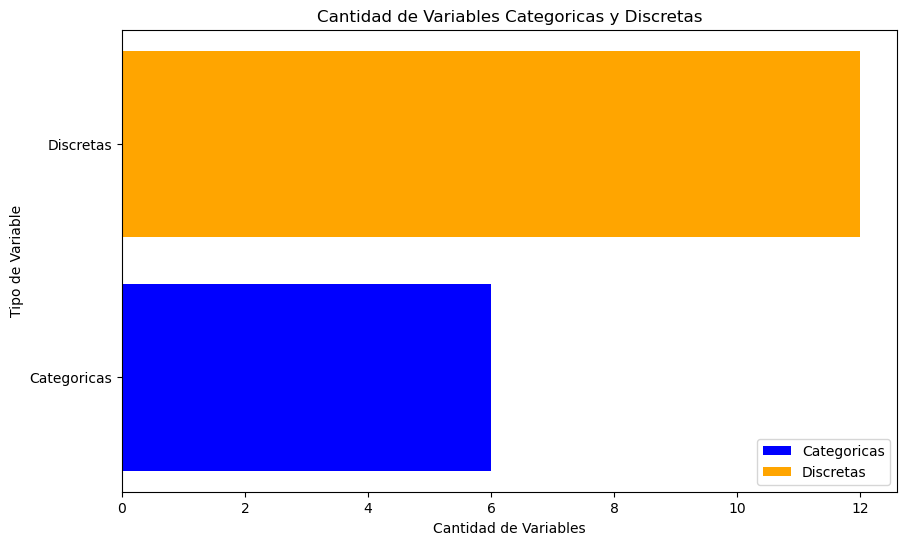

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las variables categóricas y discretas
variables_categoricas = ['carrier', 'tailnum', 'origin', 'dest', 'name_y', 'name_x']
variables_discretas = ['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'arr_time', 'sched_arr_time', 'hour', 'minute', 'flight', 'engines', 'seats']

# Calcular la cantidad de variables categóricas y discretas
cantidad_categoricas = len(variables_categoricas)
cantidad_discretas = len(variables_discretas)

# Crear la figura y los ejes para la gráfica
plt.figure(figsize=(10, 6))

# Graficar la cantidad de variables categóricas
plt.barh(['Categoricas'], [cantidad_categoricas], color='blue', label='Categoricas')

# Graficar la cantidad de variables discretas
plt.barh(['Discretas'], [cantidad_discretas], color='orange', label='Discretas')

# Añadir etiquetas y título
plt.xlabel('Cantidad de Variables')
plt.ylabel('Tipo de Variable')
plt.title('Cantidad de Variables Categoricas y Discretas')

# Mostrar la leyenda
plt.legend()

plt.show()


**ii. De densidad para las variables continuas.**

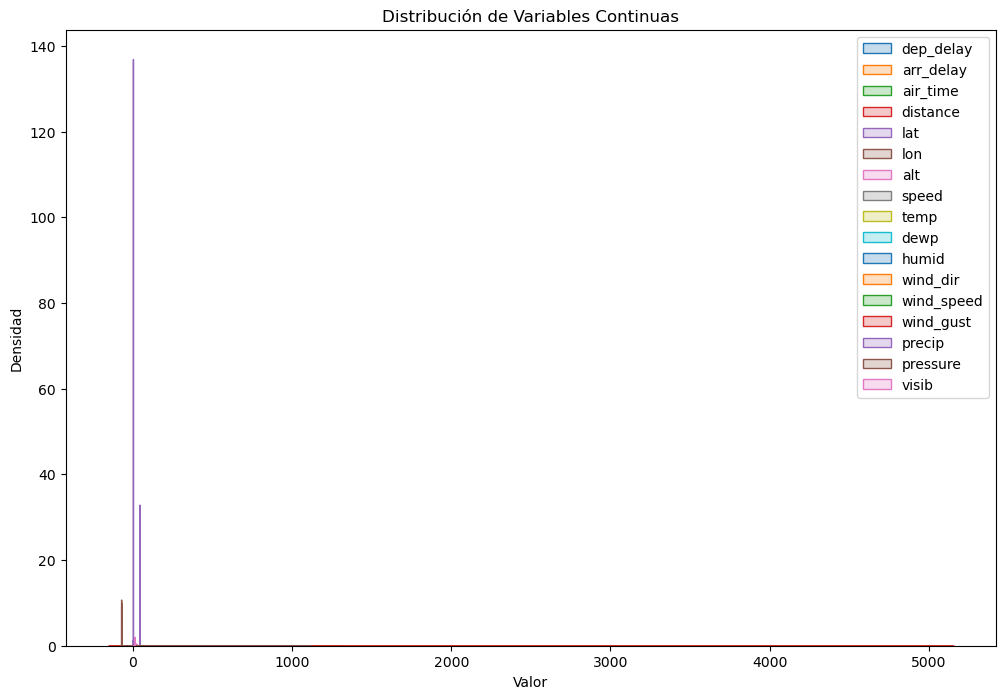

In [64]:
# Definir las variables continuas
variables_continuas = ['dep_delay', 'arr_delay', 'air_time', 'distance', 'lat', 'lon', 'alt', 
                      'speed', 'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 
                      'precip', 'pressure', 'visib']

# Crear la figura y los ejes para la gráfica
plt.figure(figsize=(12, 8))

# Graficar la densidad de cada variable continua
for variable in variables_continuas:
    sns.kdeplot(df[variable], label=variable, fill=True)

# Añadir etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Distribución de Variables Continuas')

# Mostrar la leyenda
plt.legend()

plt.show()


**iii. Serie de tiempo con el conteo de apariciones para las de fecha y hora.**

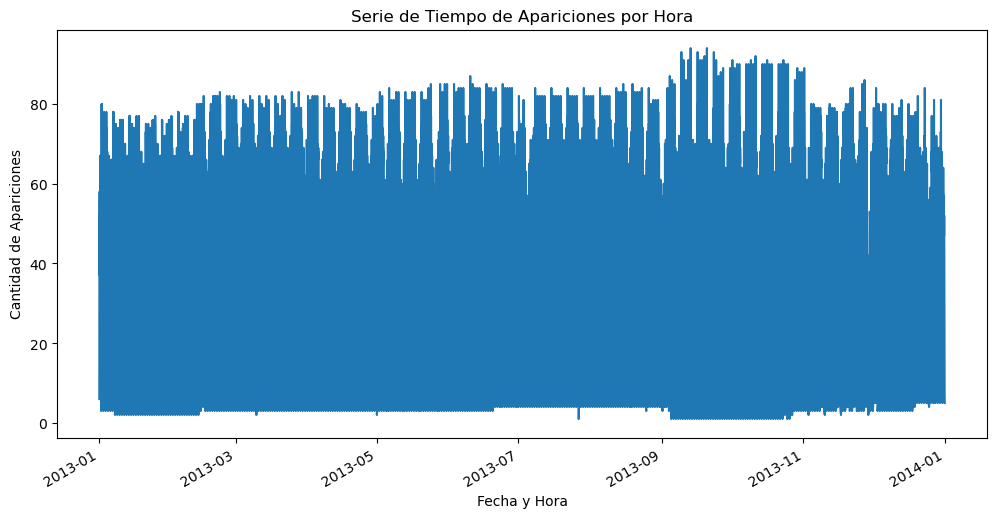

In [65]:
# Contar la frecuencia de apariciones para cada fecha y hora
conteo_por_hora = df['time_hour'].value_counts().sort_index()

# Crear la serie de tiempo
plt.figure(figsize=(12, 6))
conteo_por_hora.plot()
plt.xlabel('Fecha y Hora')
plt.ylabel('Cantidad de Apariciones')
plt.title('Serie de Tiempo de Apariciones por Hora')
plt.show()
